# 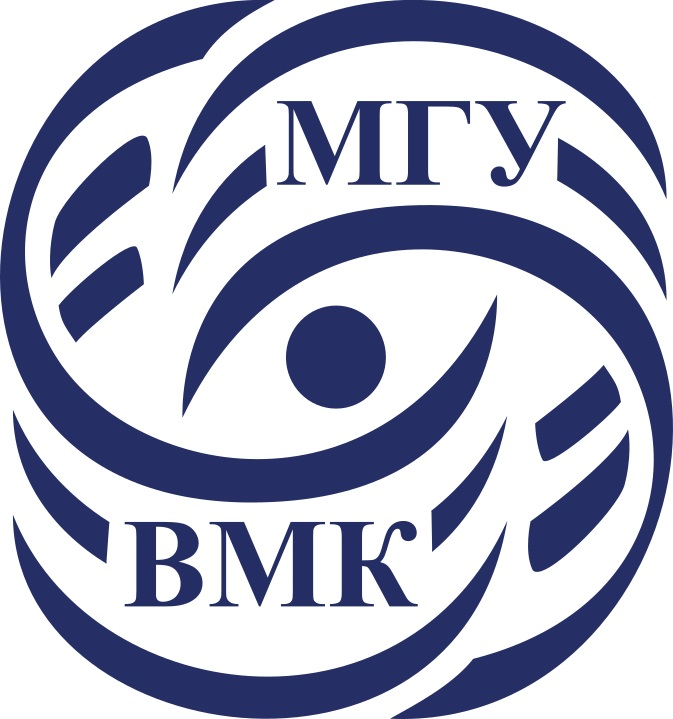

# Машинное обучение. ВМК МГУ

# Практическое задание 3: Основы sklearn на примере KNN. Нормализация признаков и Кросс-валидация

## Уровень: <font color='SkyBlue'>**Базовый (Base)**</font>

# О формате сдачи

🔷 **<font color='plum'>При решении ноутбука используйте данный шаблон</font>**

    ✅ Можно добавлять новые ячейки любых типов
    ❌ Не нужно удалять текстовые ячейки c разметкой частей ноутбука и формулировками заданий


🔷 **<font color='plum'>При оценивании задач учитывается код</font>**

    ✅ Задания, в которых необходим код, обычно помечаются фразами "Your code here"/"Ваш код" и аналогичными
    ❌ Ответы на вопросы без сопутствующего кода оцениваются в 0 баллов
    ❌ Наличе работоспособного кода в ноутбуке, если на сказано иного, обязательно

🔷 **<font color='plum'>При оценивании задач учитываются выводы</font>**

    ✅ Задания, в которых необходимы выводы, обычно помечаются фразами Вывод"/"Ответ на вопрос"/"Ваш текст" и аналогичными
    ✅ Обычно выводы подразумевают под собой текстовый ответ (можно писать markdown, latex).
    ✅ Сопутствующие изображения, графики, таблички - приветствуются!
    ❌ При отсутствии выводов задание не засчитается на полный балл

-----------
<font color="white" style="opacity:0.2024"></font>

* Многие из заданий можно выполнить  <font color='OrangeRed'>несколькими способами.</font> Не существуют единственно верного, но попробуйте максимально задействовать арсенал pandas и ориентируйтесь на простоту и понятность вашего кода. Не забывайте, что <font color='OrangeRed'>можно гуглить и что-то искать на stackoverflow, например.</font>







<font color=DarkOrange>**Примерное время выполнения (execution time/время выполнения, если нажать run all) всех ячеек ноутбука при правильной реализации: 10 минут </font>**

# Подготовка рабочей среды

Сначала установим нужные нам версии библиотек. Мы гарантируем, что в данных версиях задание будет корректно отрабатывать.

После установки нужных версий, **возможно,** нужно перезагрузить среду (runtime), но скорее всего вам это не понадобится


На скачивание файла и установку понадобится не более 5 минут.

<font color='OrangeRed'>**Важно!**</font>

Устанавливать нужные версии нужно каждый раз, когда создается новый рантайм. Например, если вы 2 часа подряд делаете это задание, то подготовить библиотеки достаточно 1 раз. Но если вы, например, начали в понедельник, затем закрыли/выключили ноутбук, то при продолжении в среду, вам нужно будет запустить рантайм заново и следовательно заново установить библиотеки.

<font color='OrangeRed'>**Важно!**</font>
Если вы предпочитаете делать практические задания на своем личном ноутбуке, то проверьте, что вы установили рабочее окружение в [соответствии с гайдом](https://github.com/MSU-ML-COURSE/ML-COURSE-24-25/blob/main/tutorials/%D0%A2%D1%83%D1%82%D0%BE%D1%80%D0%B8%D0%B0%D0%BB%20%D0%BF%D0%BE%20%D1%83%D1%81%D1%82%D0%B0%D0%BD%D0%BE%D0%B2%D0%BA%D0%B5%20%D1%80%D0%B0%D0%B1%D0%BE%D1%87%D0%B5%D0%B3%D0%BE%20%D0%BE%D0%BA%D1%80%D1%83%D0%B6%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%B2%20Python%20%D0%B4%D0%BB%D1%8F%20%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%20(2).pdf)

In [1]:
# !!! Данный блок будет работать только в Google-Colab !!!
! gdown 10k8Hwn9kpK9SpK4IEj4-EaWQZqgYT5-Q
! pip install -r /content/requirements_2024_25_for_colab_small.txt

Downloading...
From: https://drive.google.com/uc?id=10k8Hwn9kpK9SpK4IEj4-EaWQZqgYT5-Q
To: /content/requirements_2024_25_for_colab_small.txt
100% 375/375 [00:00<00:00, 1.69MB/s]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 77.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 99.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.5/41.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 60.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 67.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Проверим версию библиотеки:

In [2]:
import catboost
assert(catboost.__version__ == '1.2.7')

Теперь можно приступать к выполнению задания! :)

-----------
<font color="white" style="opacity:0.2024"></font>

# Часть 0. Знакомство с библиотекой scikit-learn

`Scikit-learn` - это библиотека машинного обучения с открытым исходным кодом, которая предоставляет различные инструменты для предобработки данных и обучения моделей.

Подробную документацию с обширным количеством теоретических и практических примеров можно найти на [сайте библиотеки](https://scikit-learn.org/stable/index.html)

## Импорт библиотеки

Можно импортировать библиотеку целиком:

In [ ]:
import sklearn

Однако, так как библиотека очень обширная и [содержит большое количество модулей](https://scikit-learn.org/stable/api/index.html), то импортируют либо модуль, либо классы/методы точечно и целенаправленно:

In [3]:
from sklearn.neighbors import KNeighborsClassifier # класс, с помощью которого мы в дальнейшем будем обучать kNN

<font color='LightSteelBlue'>**Подсказка**</font> обычно по названию модуля интуитивно понятно, какие методы и функции в нем содержатся. С увеличением практики использования библиотеки вы сможете лучше и быстрее навигироваться в ней. Например, модуль neighbors содержит различные методы поиска ближайших соседей. Помните, что есть как версии для классификации, так и для задач регрессии? Вот версию для классификации мы выше как раз и импортировали. Однако если провалиться в [описание модуля](https://scikit-learn.org/stable/api/sklearn.neighbors.html) можно увидеть еще много разных классов и функций, которые так или иначе связаны с поиском соседей.

## Общее устройство моделей

Одним из несравненных плюсов библиотеки является то, что она предоставляет максимально общий и максимально понятный интерфейс взаимодействия с различными алгоритмами машинного обучения.

Обычно, чтобы решить задачу машинного обучения, нам нужно (как минимум):
* Знать, какой моделью (алгоритмом) хотим воспользоваться
* Обучить ее на некоторое обучающей выборке
* Уметь узнавать предсказания модели на новой выборке

Вам не нужно запоминать для каждой конкретной модели, а как она вообще обучается и как это написать: библиотека все делает за вас.


Каждая <font color='DarkSeaGreen'>**модель машинного обучения**</font> имеет два метода: `fit` - метод ответственный за обучения модели и `predict` - метод ответственный за предсказание целевой переменной.
* Как правило, метод `fit` принимает на вход два аргумента: $X_{train}$ - **обучающая** выборка, $y_{train}$ - значения целевых переменных на объектах обучающей выборки.
* Метод `predict` принимает на вход набор данных $X_{test}$ и выдает предсказанные значения целевых переменных $y_{test}$ на этом наборе данных.
* В моделях классификации бывает метод `predict_proba`, который принимает на вход набор данных и выдает вероятности принадлежности классам.



- Если нами решается задача *классификации*, то вектор целевых переменных $y$ содержит целые числа (или другое множество дискретных величин).
- При решении задачи *регрессии* вектор $y$ содержит вещественные числа.



<font color='CornflowerBlue'>**Выборка (данные)**</font> $X$ представляется в виде матрицы размера `(n_samples, n_features)`, то есть каждому *объекту* соответствует отдельная строка, а каждому *признаку* - отдельный столбец.

 <font color='CornflowerBlue'>**Целевая переменная**</font> обычно представляется одномерным вектором размера `(n_samples)` - предсказаниями для каждого объекта, в случае предсказания вероятностей классов - матрицей размера `(n_samples, n_classes)` - значения вероктностей принадлежности объекта к тому или иному классу


Приведем пример стандартной работы с библиотекой `scikit-learn`

<font color='LightSteelBlue'>**Подсказка**</font> Это совсем-совсем базовый способ обучения моделей, на практике используют много дополнительных приемов, постепенно которые мы будем с вами изучать

In [4]:
#Создаем обучающую выборку
X_train = [[0], [1], [2], [3]] # матрица размера 4 x 1, 4 - объекта, 1 признак
y_train = [0, 0, 1, 1] # обучающий вектор целевых переменных

#Создаем тестовую выборку
X_test = [[1.1], [2.8]] # матрица размера 2x1, 2 - объекта, 1 признак

#Создаем объект класса 3-NN классификатора
neigh = KNeighborsClassifier(n_neighbors=3)

#Обучаем классифкатора на созданной ранее выборке
neigh.fit(X_train, y_train)

#Предсказываем метку класса нового объекта с помощью метода predict
y_test = neigh.predict(X_test)
print(y_test) # y_test - вектор размера 2 (в тестовой выборке 2 объекта)

[0 1]


## Общее устройство предобработки данных

На практике почти никогда вы не встретите идеальных данных :) Вам всегда понадобится на них посмотреть, проанализировать, где-то почистить, где-то преобразовать и пр.

Упрощая, все работу с данными можно проделать с помощью 2 библиотек:

- `pandas` - с помощью этой библиотеки проанализировать данные, посмотреть на то, что в них хранится, принять решение о удалении мусора, замены каких-то значений и прочего. Данные техники вы совсем немного затронули в предыдущем домашнем задании, но подробнее мы к ним вернемся в следующем домашнем задании

- `skelarn` - технические способы обработки данных, особенности которых связаны непосредственно с моделью или способом обучения

<font color='RosyBrown'>**Пример**</font> Данная библиотека поможет решить вопрос: а как нам признаки с типом строка (например, название видео) "запихнуть" в kNN? Он же только чиселки умеет понимать?

<font color='RosyBrown'>**Пример**</font>
Или на следующий вопрос: с лекции немного припоминаю, что для более хорошей работы метрических методов хорошо бы данные привести в один масштаб. Как это можно быстро и безболезненно сделать?

 Например, есть 2 признака:
- вероятность покупки $p$ - лежит на отрезке [0, 1]
- стоимость покупки $s$ - лежит на отрезке [0, 100000500000]

Хотелось бы чтобы оба признака были на отрезке [0, 1], потому что покупка, кажется, может вносить гораздо больший вклад по расстоянию в обучении модели..



В `sklearn` способы обработки данных также предоставляются через различные классы, которые имеют одинаковый интерфейс:

Каждый **<font color=DarkSeaGreen>модуль предобработки</font>** данных имеет два метода: `fit` и `transform`.

* Как правило, метод `fit` принимает на вход **обучающую** выборку $X_train$ и считает по ней необходимые для заданного типа преобразования статистики.
* Метод `transform` преобразует входные данные, используя статистики, посчитанные при вызове метода `fit` и возвращает преобразованные данные.


<font color='LightSteelBlue'>**Пояснение:**</font> Когда не хватает `pandas` или `skelarn`, можно обратиться к другим библиотекам, например, `numpy` :) Sklearn обычно одинаково хорошо работает с данными, представленным как и pd.DataFrame, так и numpy-array или обычными вложенными питоновскими списками

------


In [5]:
import numpy as np
X_train = np.array([[0, 0], [0.5, 100], [1, 1000005000]]) # numpy используем для удобства отображения
# выборка из 3 примеров, 1й признак - вероятность покупки p
# 2й признак - стоимость покупки s

print(X_train)

[[0.000000e+00 0.000000e+00]
 [5.000000e-01 1.000000e+02]
 [1.000000e+00 1.000005e+09]]


In [6]:
from sklearn.preprocessing import MinMaxScaler # штука, которая приводит все значения признаков к отрезку [0, 1]
# В части 1 подробнее разберем

scaler = MinMaxScaler() # создаем экземпляр класса

scaler.fit(X_train) # "обучаем" преобразователь, на самом деле под капотом считаются статистики
# X_train тут не меняется!

MinMaxScaler()

In [7]:
# Теперь метод для каждого признака посчитал его минимальные и максимальные значения
# Но это под капотом, сюда можно вообще не лезть
scaler.data_min_, scaler.data_max_

(array([0., 0.]), array([1.000000e+00, 1.000005e+09]))

In [8]:
X_new = scaler.transform(X_train)
X_new
# Значения в 1й признаке не поменялись, так как они уже удовлетворяли условию
# А во втором - стали на отрезке [0, 1]

array([[0.00000e+00, 0.00000e+00],
       [5.00000e-01, 9.99995e-08],
       [1.00000e+00, 1.00000e+00]])

# Часть 1. Нормализация признакового пространства

В задачах машинного обучения важную роль играет нормализация данных. Ее мы затронули как раз выше. Для числовых признаков, как правило, используют два типа нормализации:

* Нормализация к распределению с нулевым матожиданием и единичной дисперсией, $x := \frac{x - E(x)}{\sigma (x)}$, где матожидание $E(x)$ и стандартное отклонение $\sigma (x)$ считаются <font color='DarkSeaGreen'>**по каждому признаку (столбцу) отдельно**</font>
* Нормализация в отрезок [0, 1], $x := \frac{x - \min(x)}{\max(x) - \min(x)}$, где минимум и максимум берется <font color='DarkSeaGreen'>**по каждому признаку (столбцу) отдельно**</font> (как в примере выше)

<font color='RosyBrown'>**Пример**</font>

Ниже приведены: таблица до нормализации признаков, таблица после нормализации к нулевому матожиданию и единичной дисперсии, таблица после нормализации в отрезок [0, 1]

<font color='plum'>**До нормализации**</font>

| Признак 1   | Признак 2   |
| ----------- | ----------- |
| 1           | 2           |
| 2           | -1          |
| 3           | 0           |

<font color='plum'>**Нормализация к нулевому матожиданию и единичной дисперсии**</font>

| Признак 1   | Признак 2   |
| ----------- | ----------- |
| -1.225      | 1.336       |
| 0           | -1.069      |
| 1.225       | -0.267      |

<font color='plum'>**Нормализация в отрезок [0, 1]**</font>

| Признак 1   | Признак 2   |
| ----------- | ----------- |
| 0           | 1           |
| 0.5         | 0           |
| 1           | 0.333       |

---

### <font color='DarkOrange'>**Задание 1.1 (юнит-тесты, 4 баллa)**</font>

В модуле `scalers.py` реализуйте два вида нормализации признакового пространства. `StandardScaler` - нормализация к распределению с нулевым матожиданием и единичной дисперсией, `MinMaxScaler` - нормализация в отрезок [0, 1].

Нормализаторы имеют два метода - метод `fit` и метод `transform`, что максимально повторяет концепцию `sklearn`. Метод `fit `получает на вход **обучающую** выборку и считает по ней все необходимые для заданного преобразования статистики, которые сохраняет во внутренние поля класса. Метод `transform` преобразует данные, используя статистистики, посчитанные при вызове метода `fit`.

Примеры запусков функций можно увидеть в открытых тестах.

<font color='OrangeRed'>**Внимание!**</font> В текущую директорию необходимо загрузить файл  scalers.py с реализованными классами. В Google Colab это можно сделать, нажав на значок "папки" слева, дальше на "загрузить" (значок листа со стрелкой вверх). Загружать нужно в папку "sample_data" (она у вас откроется по умолчанию)

-----------

<font color='OrangeRed'>**Внимание!**</font> Перед тем, как выполнять задание дальше, убедитесь, что ваша реализация проходит тесты с системе проверке заданий, и вы загрузили сюда вашу реализацию

Теперь посмотрим работу "скейлеров" на примере данных:

In [28]:
from scalers import StandardScaler, MinMaxScaler

In [29]:
import numpy as np
import seaborn as sns
import pickle

from matplotlib import pyplot as plt


plt.rcParams["figure.figsize"] = (5,5)

Загрузим файл с данными data.pkl:

In [12]:
!gdown 1acbP4PNmu11rkBzozvIc3bowWaQL7iFe

Downloading...
From: https://drive.google.com/uc?id=1acbP4PNmu11rkBzozvIc3bowWaQL7iFe
To: /content/data.pkl
100% 5.03k/5.03k [00:00<00:00, 15.5MB/s]


Загрузим данные в память. В переменной $X$ будут храниться признаковые описания объектов, в переменной $y~-$ метки классов

In [13]:
with open('/content/data.pkl', 'rb') as file:
    X, y = pickle.load(file)

In [14]:
def plot_data_points(X, labels, xlim, ylim):
    g = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels)
    g.set(xlim=xlim, ylim=ylim)
    plt.xlabel('x_1')
    plt.ylabel('x_2')
    plt.grid()

Визуализируем наши данные

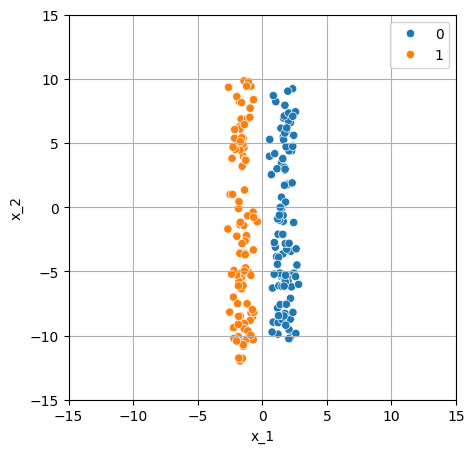

In [15]:
plot_data_points(X, y, xlim=(-15, 15), ylim=(-15, 15))

Как видно, наши данные идеально разделяются прямой $x=0$

Функция $plot\_knn\_bound$ принимает на вход объекты $X$, метки классов $y$, метод нормализации признаков $scaler$, число соседей $n\_neighbors$ и границы рисунка $xlim$, $ylim$. Функция обучает $KNN$ классификатор с числом соседей $n\_neighbors$ и визуализирует разделяющую поверхность для классов, полученную с помощью обученного $KNN$ классификатора.

* Если вы не можете различить _выбранные нами цвета_, то измените список цветов в переменных cmap_light и cmap_bold. Актуальный список возможных цветов находится [здесь](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

In [20]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

def plot_knn_bound(X, y, scaler=None, n_neighbors=10, xlim=(-15, 15), ylim=(-20, 20)):
    # step size in the mesh
    h = 0.05

    # Create color maps
    cmap_light = ListedColormap(['plum', 'blue', 'plum', 'green'][:np.unique(y).shape[0]])
    cmap_bold = ['plum', 'blue', 'plum', 'darkgreen'][:np.unique(y).shape[0]]

    x_min, x_max = xlim
    y_min, y_max = ylim
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]

    X_scaled = X # if scaler is None
    if scaler is not None:
        grid = scaler.transform(grid)
        X_scaled = scaler.transform(X)

    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, algorithm='brute')
    clf.fit(X_scaled, y)

    Z = clf.predict(grid)

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y,
                    palette=cmap_bold, alpha=1.0, edgecolor="black")
    plt.xlabel('x_1')
    plt.ylabel('x_2')
    plt.title('Разделяющие поверхности алгоритма {}-NN'.format(n_neighbors))
    plt.grid()
    plt.show()

Нарисуем разделющие поверхности $1$-$NN$ и $10$-$NN$

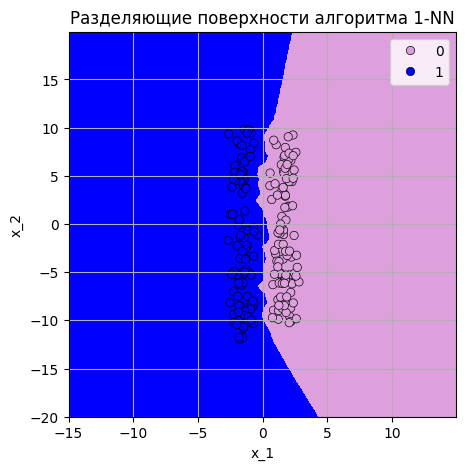

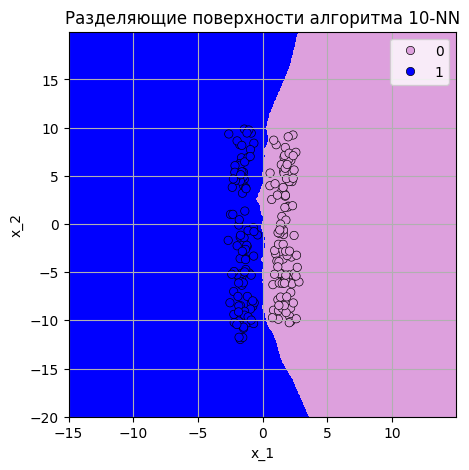

In [27]:
plot_knn_bound(X, y, n_neighbors=1)
plot_knn_bound(X, y, n_neighbors=10)

### <font color='DarkOrange'>**Задание 1.2 (кросс-проверка, 2 балла)**</font>

Чем отличаются поверхности, полученные при числе соседей 1 и 10? Объясните, чем вызваны данные отличия

<font color='MediumOrchid'>**Ваши выводы тут:**</font>
По графикам видно, что при числе соседей 1 граница разделения более "ломаная" и неровная. Это объясняется тем, что зависимость в данном случае идет лишь от одного ближайшего соседа, из-за чего такая модель более чувствительна к шуму и переобучению. При этом при числе соседей 10 линия разделения выглядит более гладкой, ибо в данном случае учитывается несколько соседей. Это снижает влияние пограничных значений и шума, но также может привести к меньшей точности на некоторых участках, что видно на верхнем значении. Так, слишком малое значение k ближайших соседей хорошо для локальных особенностейй, большое - для обобщенности модели.

---

### <font color='DarkOrange'>**Задание 1.3 (кросс-проверка, 1 балл)**</font>

Данную проблему может решить нормализация признакового пространства.

Начертите разделяющие поверхности для $KNN$, обученного на нормализованных признаках с помощью реализованных вами нормализаторов. Используйте функцию $plot\_knn\_bound$. Менять функцию $plot\_knn\_bound$ нельзя.

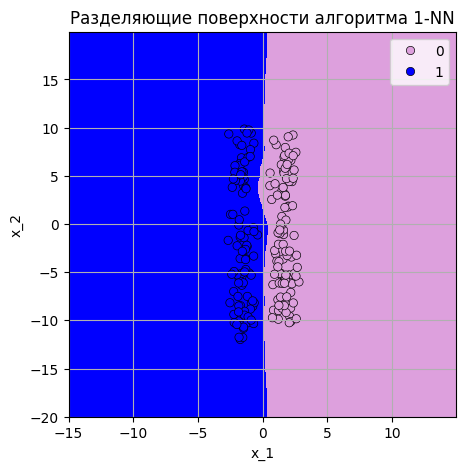

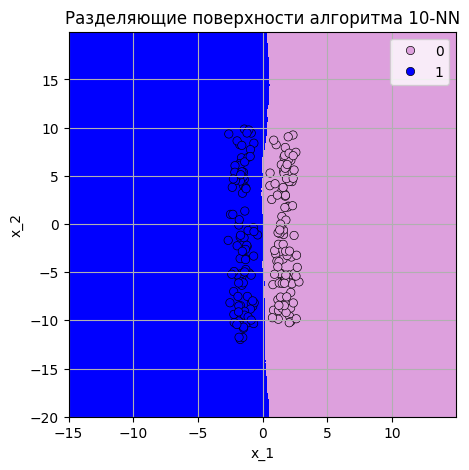

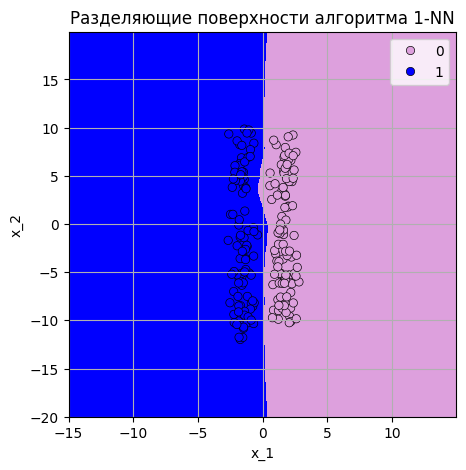

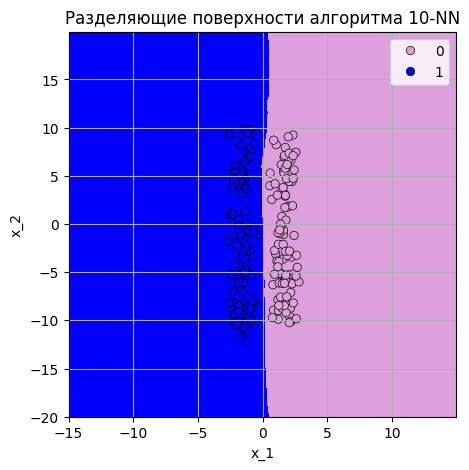

In [30]:
# your code here
std_scal = StandardScaler()
minmax_scal = MinMaxScaler()
std_scal.fit(X)
minmax_scal.fit(X)

plot_knn_bound(X, y, n_neighbors=1, scaler=std_scal)
plot_knn_bound(X, y, n_neighbors=10, scaler=std_scal)
plot_knn_bound(X, y, n_neighbors=1, scaler=minmax_scal)
plot_knn_bound(X, y, n_neighbors=10, scaler=minmax_scal)

# Часть 2. Кросс-валидация на задаче регрессии

Часто модели в машинном обучении имеют вид не просто какой-то функции, а какой-то функции с некоторыми, так называемыми <font color='CornflowerBlue'>**гиперпараметрами**</font> - это такие переменные величины, которые могут существенно повлиять на качество и вид модели, но напрямую обучить их нельзя (то есть в методе fit они вообще не обучаются). Одним из примеров таких гиперпараметров является:

`n_neighbors` - кол-во соседей в методах kNN. Если вернуться в начало ноутбука, то можно увидеть, что имено это значение мы явно задавали, когда создавали модель с помощью класса `KNeighborsClassifier.`

В этот момент возникает <font color='OrangeRed'>**закономерный вопрос:**</font> а как нам найти то значение гиперпараметров, при которых наша модель будет показывать более высокие результаты решения задачи?

-----------

Продолжаем проваливаться в "кроличью нору" дальше. Для того, чтобы ответить на предыдущий вопрос, нужно сначала понять <font color='OrangeRed'>**следующее:**</font> а как оценивать-то собственно качество моделей? Пусть даже мы зафиксировали какой-то гиперпараметр, как нам оценивать, насколько наша модель хороша?

Чтобы уметь оценивать качество моделей ("насколько вообще хорошо мы решили задачу") хочется иметь некий "стандарт качества" - данные, которые вообще не участвовали в обучении ("модель их не видела") и верные ответы на этих данных (которые модель также не видела)

При решении прикладных задач, как правило, доступна лишь обучающая выборка, а "стандарт качества" зачастую отсутствует. Решить данную проблему нам поможет техника, называемая <font color='CornflowerBlue'>**кросс-валиация**</font>. Данная техника позволяет создавать "стандарты качества" (тестовые наборы, выборки) используя только обучающую выборку, но не позволяя модели "подглядывать" в создаваемые тестовые наборы.



<font color='DarkSeaGreen'>**Алгоритм применения кросс-валидации**</font>

Пусть зафиксирован некоторый набор значений гиперпараметров модели. В $KNN$ под гиперпараметрами могут пониматься число соседей n_neighbors, метрика близости $\rho$, стратегия выбора весов $w_i$.

* При кросс-валидации <font color='CornflowerBlue'>**обучающая**</font> выборка делится на $n$ равных частей (folds, фолды).
* Затем обучаются $n$ моделей с заданными гиперпараметрами (у всех моделей гиперпараметры одинаковые и фиксированы) - $i$-ая модель обучается на всей обучающей выборке, <font color='DarkSeaGreen'>**кроме объектов, которые попали в $i$-ый фолд (out-of-fold).**</font>
* $i$-й фолд объявляется "стандартом качества" (тестовым). Затем измеряется качество $i$-ой модели на $i$-ом фолде. Так как он не участвовал в обучении этой модели, то полученная оценка качества модели будет являться корректной.
* Финальным значением метрики качества для модели с заданными гиперпараметрами является <font color='DarkSeaGreen'>**среднее полученных нами значений**</font> на $n$ фолдах.

<font color='Turquoise'>**Идея:**</font> Подумайте, как в описанную выше схему корректно добавить обучение скейлеров. Корректно ли будет масштабировать сначала все данные и потом делать кросс-валидацию или все-таки нужно как-то действовать хитрее?


Собственно, теперь мы можем выбрать наилучшие гиперпараметры по следующему алгоритму:
* Фиксируем, какие значения гиперпараметров хотим перебрать
* Для каждого набора значений проводим кросс-валидацию
* Для каждого набора значений сохраняем качество на кросс-валидации
* Выбираем тот набор значений гиперпараметров, где качество оказыается наилучшим!







Принцип работы кросс-валидации схематично изображен на рисунке.



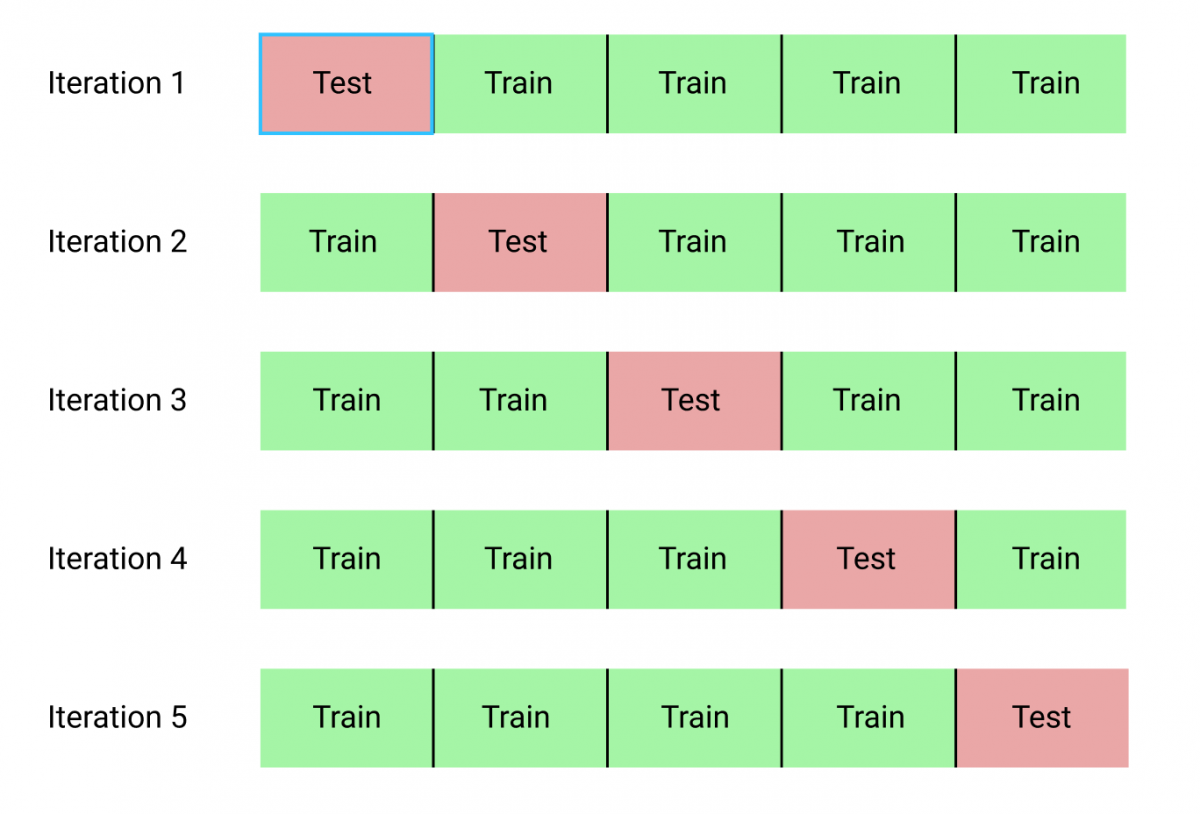

Небольшое видео объяснение о том, как работает кросс-валидация, можно посмотреть по [ссылке](https://www.youtube.com/watch?v=fSytzGwwBVw)

-----------
<font color="white" style="opacity:0.2024"></font>

Теперь применем все полученные знания на практике на примере тренировочного датасета!

Далее будем решать задачу предсказания цены дома в Калифорнии с помощью $KNN$-регрессии. Цена дома - вещественное число, поэтому наша задача - задача регрессии. В качестве метрики качества будем использовать $R^2-$score.

$R^2(y\_true, y\_predict) = 1 - \frac{\sum_{i=1}^{n} (y\_true_i - y\_predict_i)^2}{\sum_{i=1}^{n} (y\_true_i - E(y\_true_i))^2}$

<font color='OrangeRed'>**Примечание**</font> вы же помните, что предсказания и верные ответы можно оценивать по-разному и это называется метриками качества? Если данная теория подзабылась, то освежите, пожалуйста, знания лекционным материалом

In [31]:
from sklearn.datasets import fetch_california_housing # Да, из sklearn даже можно импортировать данные
from sklearn.model_selection import train_test_split # Вспомогательная функцию которая разобьет нам датасет на 2 части

In [32]:
X, y = fetch_california_housing(return_X_y=True)

 Мы разобьем выборку на 2 части: обучающую (75%) и тестовую (25%) с помощью функции $train\_test\_split$. По умолчанию данная функцию перемешивает данные, что часто оказывается полезно в задачах подобного рода.

 Зачем мы разбиваем? Мы пытаемся "эмулировать" жизеннную ситуацию. ML-разработчику приносят данные, говорят "обучи как можно лучше", потом мы протестируем твою модель на новых данных. Вот та тестовая выборка, которую мы выделили (25%) - это те данные, <font color='OrangeRed'>**в которые ни в коем случае во время обучения подглядывать нельзя**</font>, нас потом на них будут проверять!

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Pipeline и перебор гиперпараметров

Кросс-валидация в `skelarn`, как нетрудно догадаться, уже реализована, остается научиться ее запускать :)

Но перед этим изучим еще парочку джедайских техник работы с `sklearn`, которые облегчат жизнь при написании моделей


In [34]:
from sklearn.neighbors import KNeighborsRegressor # kNN - регрессия
from sklearn.pipeline import Pipeline # разберем ниже
from sklearn.model_selection import GridSearchCV # класс, выполняющий кросс-валидацию
from sklearn.preprocessing import MinMaxScaler, StandardScaler # будем здесь использовать уже реализованные скейлеры

Что нам собственно нужно при решении задачи с учетом кросс-валидации?

* Понять, предобрабатываем ли мы как-то данные или нет
* Зафиксировать модель
* Зафиксировать метрику качества
* Понять, какие гиперпараметры мы хотим перебрать
* Собственно выбрать лучший набор с помощью кросс-валидации
* И оценить, а что на тестовой выборке-то получилось!

Шаг 1 и шаг 2 - объединяются логически - часто бывает так, что нам сначала нужно применить логику предобработки данных, а затем уже применить и обучить модель.

Логическая цепочка в таком случае будет выглдять так:

    X -> предобрабатываем X -> X уходит в fit некоторой модели

`sklearn` Предоставляет удобное решение для составление таких цепочек-шагов обработки результатов, полученных на предыдущем шаге. Инструмент назвается Pipeline (пайплайны):



In [35]:
pipeline = Pipeline([
    ('normalizer', MinMaxScaler()),
    ('classifier', KNeighborsRegressor())
])

В данном примере вы говорим, что хотим, чтобы сначала данные отскелились, а потом, что получилось, подалось бы модели. Причем шаги этой цепочки обозначены строковыми и понятными обозначениям, которые нам скоро понадобятся

`Pipeline` наследует абсолютно то же интерфейс, что и остальные модули обучения в `sklearn` - имеет методы `fit` и `predict`! То есть получили некоторый "сборный конструктор" из различных частей.

In [36]:
pipeline.fit(X_train, y_train)
pipeline.predict(X_test)

array([0.5482  , 0.7506  , 4.628604, ..., 1.328   , 2.4206  , 4.089404])

Далее встает вопрос: а как этот процесс обучения можно варьировать? В самом `KNeighborsRegressor` много гиперпараметров (число соседей, метрика расстояния и пр.), которые задаются при создании класса, а мы в `Pipeline` создали дефолтный экземпляр класса.. И вообще, можно же еще и перебирать, хотим ли мы использовать скейлер или нет, вдруг будет лучше без него? (а такое тоже бывает!)

И здесь `sklearn` нас снова выручает и дает возможность варьировать создание моделей, которые мы используем в `Pipeline`:

In [37]:
parameters = {
    'classifier__n_neighbors': [1, 5, 10],
    'classifier__metric': ['euclidean', 'cosine'],
    'classifier__weights': ['uniform', 'distance'],
    'normalizer': ['passthrough', MinMaxScaler(), StandardScaler()]
}

Мы можем задать такой словарик типа `str` -> `list`, который будет описывать все наши изменения, которые должны будут примениться в `Pipeline` (применяться они будут через класс кросс-валидации)

Если в качестве ключа написать ровно то название, которым мы обозначили шаг в `Pipeline`, то потом появляется возможность программно сопоставить эти два шага и заменить значения в `Pipeline`:

    'normalizer': ['passthrough', MinMaxScaler(), StandardScaler()]

В данном случае у нас в `Pipeline` значения в названии шага `normalizer` будут меняться в соответствии с предложенными вариантам в списке

<font color='LightSteelBlue'>**Пояснение:**</font> `passthrough` - ключевое слово, которые говорит `sklearn` "пропусти этот шаг"

А здесь уже логика чуть посложнее: у класса `KNeighborsRegressor`, который лежит в шаге classifier, при создании можно указать различный набор гиперпараметров, например, тот же n_negihbors. Обращаясь через двойное нижнее подчеркивание появляется возможность на лету изменять значения этих гиперпараметров в классе:

    'classifier__n_neighbors': [1, 5, 10]

Здесь мы говорим "посмотри, что за модель лежит на шаге classifier, и замени у нее гиперпараметр n_neighbors в соответствии с сеткой перебора"

### <font color='DarkOrange'>**Задание 2.1 (кросс, 2 балла)**</font>


Запустите кросс-валидацию на 3 фолдах с помощью класса `GridSearchCV` и метода $fit$ этого модуля. В качестве метрики используйте $R^2$-score (строкое представление в `sklearn` "r2"). Параметры для перебора описаны ниже

In [38]:
# задаем нужный пайплайн
pipeline = Pipeline([
    ('normalizer', 'passthrough'),
    ('classifier', KNeighborsRegressor())
])

# и сетку перебора параметров
parameters = {
    'classifier__n_neighbors': [1, 5, 10],
    'classifier__metric': ['euclidean', 'cosine'],
    'classifier__weights': ['uniform', 'distance'],
    'normalizer': ['passthrough', MinMaxScaler(), StandardScaler()]
}

grid_search = GridSearchCV(pipeline, parameters, cv=3, scoring="r2", n_jobs=-1, verbose=10)
grid_search.fit(X, y)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('normalizer', 'passthrough'),
                                       ('classifier', KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid={'classifier__metric': ['euclidean', 'cosine'],
                         'classifier__n_neighbors': [1, 5, 10],
                         'classifier__weights': ['uniform', 'distance'],
                         'normalizer': ['passthrough', MinMaxScaler(),
                                        StandardScaler()]},
             scoring='r2', verbose=10)

Посмотрим на результаты кросс-валидации. Посмотреть результаты можно удобно через аттрибут `cv_results_`:

In [39]:
for elem in zip (grid_search.cv_results_['params'], grid_search.cv_results_['mean_test_score']):
  print(elem)

({'classifier__metric': 'euclidean', 'classifier__n_neighbors': 1, 'classifier__weights': 'uniform', 'normalizer': 'passthrough'}, -0.3362348640911485)
({'classifier__metric': 'euclidean', 'classifier__n_neighbors': 1, 'classifier__weights': 'uniform', 'normalizer': MinMaxScaler()}, 0.24867244140363423)
({'classifier__metric': 'euclidean', 'classifier__n_neighbors': 1, 'classifier__weights': 'uniform', 'normalizer': StandardScaler()}, 0.3274230299815936)
({'classifier__metric': 'euclidean', 'classifier__n_neighbors': 1, 'classifier__weights': 'distance', 'normalizer': 'passthrough'}, -0.3362348640911484)
({'classifier__metric': 'euclidean', 'classifier__n_neighbors': 1, 'classifier__weights': 'distance', 'normalizer': MinMaxScaler()}, 0.24867244140363423)
({'classifier__metric': 'euclidean', 'classifier__n_neighbors': 1, 'classifier__weights': 'distance', 'normalizer': StandardScaler()}, 0.3274230299815935)
({'classifier__metric': 'euclidean', 'classifier__n_neighbors': 5, 'classifier_

### <font color='DarkOrange'>**Задание 2.2 (кросс, 1 балл)**</font>

 Какой наибольший $r2\_score$ удалось достичь на кросс-валидации? Какие закономерности вы видите?

 * Обучите модель с наилучшими параметрами на всей обучающей выборке
 * измерьте $r2\_score$ на тестовой выборке.


In [45]:
from sklearn.metrics import r2_score

In [55]:
max_r2 = max(grid_search.cv_results_['mean_test_score'])
params = grid_search.best_params_
print(f"r2_score: {max_r2}")
print(f"Parameters: {params}")

r2_score: 0.5758623486412348
Parameters: {'classifier__metric': 'cosine', 'classifier__n_neighbors': 10, 'classifier__weights': 'distance', 'normalizer': StandardScaler()}


In [57]:
std_scal = StandardScaler()
std_scal.fit(X_train)
X2 = std_scal.transform(X_train)
knr = KNeighborsRegressor(n_neighbors=10, weights="distance", metric="cosine")
knr.fit(X2, y_train)
std_scal.fit(X_test)
X3 = std_scal.transform(X_test)
y_pred = knr.predict(X3)
print(f"R_2_score = {r2_score(y_test, y_pred)}") #это тест

R_2_score = 0.7043894678085637


<font color='MediumOrchid'>**Ваши выводы тут:**</font>
На кросс-валидации удалось достичь значения r2_score = 0.5758623486412348. Наилучшими парамтрами являются следующие: метрика cosine, число соседей 10, параметр весов distance, нормализатор StandartScaler. С нормализацией (в данном случае StandardScaler) модель обучается заметно лучше, как и с увеличением числа соседей. Так, значение r2_score на тестовой выборке составило примерно 0.70.

Поздравляем с первой обученной моделью машинного обучения!